This notebook very roughly estimates what sort of masses and decay rates that FASER would be sensitive to.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

c = 3 * 10 * 8
hbar = 6.6 * 10 ** -16 # eV * s
hbar = hbar * 10 ** -9 # GeV * s

m_pi0 = 0.135 # GeV
m_eta = 0.548 # GeV
m_KL  = 0.497 # GeV
m_D   = 1.865 # GeV
m_B   = 5.280 # GeV

In [2]:
gammas = np.logspace(-35,-15)    # Decay rate in GeV
ms     = np.linspace(0.01,5,500) # mass in Gev (400 MeV)
p      = 10**4                   # momentum in GeV (1 TeV)

taus   = hbar / gammas # Lifetime at rest in seconds

d     = np.array([[c * tau * p / m for m in ms] for tau in taus])
            # Decay length in the lab frame in m

L     = 400 # Far distance to FASER (m)
delta = 1.5 # Decay length in FASER (m)

In [3]:
# This funciton calculates the probability for a particle in the lab frame
# to decay inside the FASER volume
#
# gamma is the decay rate in the rest frame
# m is the mass
# p is the momentum

def probDecay(gamma, m, p):
    tau = hbar/gamma
    d = c * tau * p / m
    
    # Distance from the LHC to the FASER volume
    L = 400
    # Length of the FASER volume
    delta = 1.5
    
    return delta/d * np.exp(-L/d)

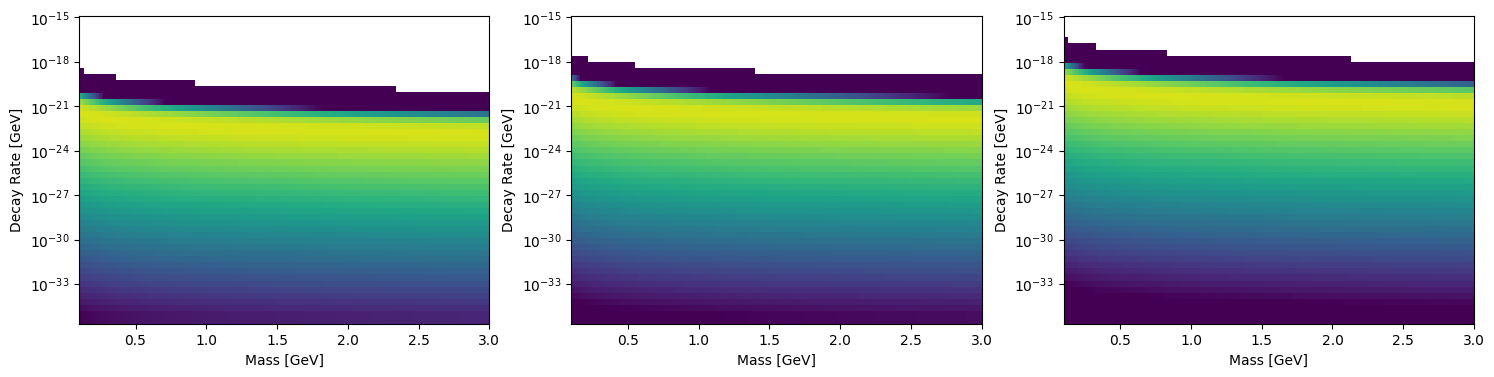

In [4]:
ps = [10**2, 10**3, 10**4]

fig = plt.figure(figsize=(6*3,4))

i=1
for p in ps:
    ax = plt.subplot(1,3,i)
    probs = np.array([[probDecay(gamma, m, p)
                       for m in ms]
                       for gamma in gammas])

    ax.pcolor(ms, gammas, probs,
              norm=matplotlib.colors.LogNorm(vmin=10**-16,vmax=10**-2))
    ax.set_xlabel('Mass [GeV]')
    ax.set_ylabel('Decay Rate [GeV]')
    ax.set_xlim([0.1,3])
    ax.set_yscale('log')
    i += 1


### For benchmarking:

These are the rough number of mesons you can expect for the number of each neutral meson which could reach the FASER volume. 

These values are estimated from plots in FASER papers from Iftah.

$$ N_{\pi^0}(p=10^3, \theta=10^{-4}) \sim 10^{14} $$
$$ N_{K_L}(p=10^3, \theta=10^{-4}) \sim 10^{14-15} $$
$$ N_{\eta}(p=10^3, \theta=10^{-4}) \sim 10^{13} $$
$$ N_{D_s}(p=10^3, \theta=10^{-4}) \sim 10^{11} $$
$$ N_{B}(p=10^3, \theta=10^{-4}) \sim 10^{9-10} $$



In [14]:
# Initialize values in variables
N_pi0 = 10**14
N_KL = 10**14
N_eta = 10**13
N_D = 10**11
N_B = 10**9

### Bounds on invisible decays

$$ Br(\pi^0 \rightarrow \text{invis.}) \lesssim 10^{-7} \qquad \texttt{[1409.2288]}$$
$$ Br(K_L (K_S) \rightarrow \text{invis.}) \lesssim 10^{-4} \qquad \texttt{[1409.2288]}\quad (\text{From sums})$$
$$ Br(\eta \rightarrow \text{invis.}) \lesssim 10^{-4} \qquad \texttt{[1409.2288]}$$

Projected future bounds are $10^{-8},10^{-6}(10^{-8}), 10^{-7}$ for $\pi^0, K_L (K_S), \eta$ respectively (https://arxiv.org/abs/1409.2288). Note paper is dated 2018 despite the 2014 arXiv number. Are these the up to date bounds?

$$ Br(\omega \rightarrow \text{invis.}) \lesssim 10^{-5} \qquad \texttt{[1805.05613]}$$
$$ Br(\phi \rightarrow \text{invis.}) \lesssim 10^{-4} \qquad \texttt{[1805.05613]}$$

BESIII results in 2018 (https://arxiv.org/abs/1805.05613)

$$ Br(B^0 \rightarrow \text{invis.}) \lesssim 10^{-5} \qquad \texttt{[1206.2543]}$$

BABAR and Belle bounds from 2012 (https://arxiv.org/abs/1206.2543, https://arxiv.org/abs/1206.5948)

$$ Br(D^0 \rightarrow \text{invis.}) \lesssim 10^{-5} \qquad \texttt{[1808.10567]} $$

Belle bound in 2018 (https://arxiv.org/abs/1808.10567). Future projections of order $10^{-8}$.

In [6]:
Br_pi0 = 10**-7
Br_KL = 10**-4
Br_eta = 10**-4
Br_D = 10**-5
Br_B = 10**-5

In [7]:
p = 10**3

probs = np.array([[probDecay(gamma, m, p)
                       for m in ms]
                       for gamma in gammas])

pi0_Decays = probs * N_pi0 * Br_pi0
KL_Decays = probs * N_KL * Br_KL
eta_Decays = probs * N_eta * Br_eta
D_Decays = probs * N_D * Br_D
B_Decays = probs * N_B * Br_B

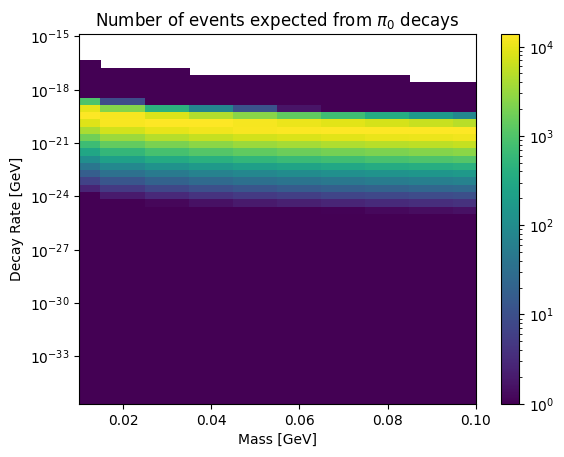

In [15]:
plt.pcolor(ms, gammas, pi0_Decays,
          norm=matplotlib.colors.LogNorm(vmin=1))
plt.xlabel('Mass [GeV]')
plt.ylabel('Decay Rate [GeV]')
plt.xlim([0.01,0.1])
plt.yscale('log')
plt.title('Number of events expected from $\pi_0$ decays')
plt.colorbar();

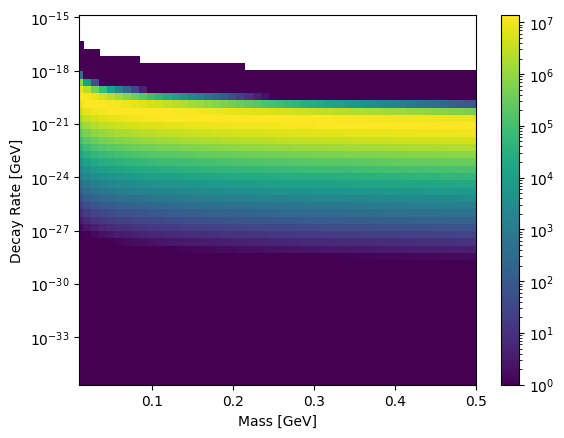

In [9]:
plt.pcolor(ms, gammas, KL_Decays,
          norm=matplotlib.colors.LogNorm(vmin=1))
plt.xlabel('Mass [GeV]')
plt.ylabel('Decay Rate [GeV]')
plt.xlim([0.01,0.5])
plt.yscale('log')
plt.title('Number of events expected from $K$ decays')
plt.colorbar();

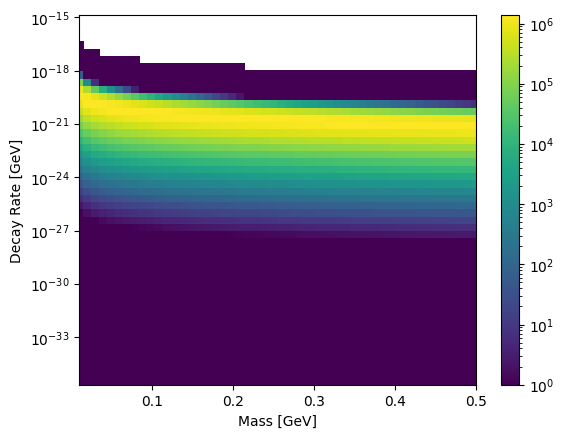

In [10]:
plt.pcolor(ms, gammas, eta_Decays,
          norm=matplotlib.colors.LogNorm(vmin=1))
plt.xlabel('Mass [GeV]')
plt.ylabel('Decay Rate [GeV]')
plt.xlim([0.01,0.5])
plt.yscale('log')
plt.title('Number of events expected from $\eta$ decays')
plt.colorbar();

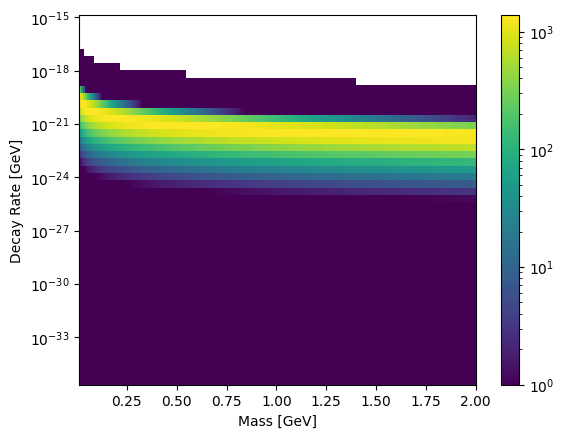

In [11]:
plt.pcolor(ms, gammas, D_Decays,
          norm=matplotlib.colors.LogNorm(vmin=1))
plt.xlabel('Mass [GeV]')
plt.ylabel('Decay Rate [GeV]')
plt.xlim([0.01,2])
plt.yscale('log')
plt.title('Number of events expected from $D$ decays')
plt.colorbar();

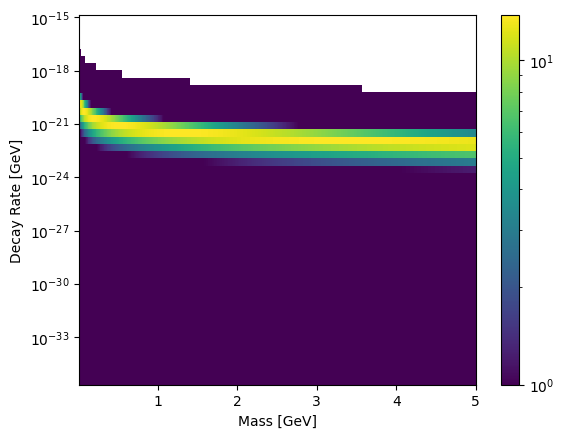

In [12]:
plt.pcolor(ms, gammas, B_Decays,
          norm=matplotlib.colors.LogNorm(vmin=1))
plt.xlabel('Mass [GeV]')
plt.ylabel('Decay Rate [GeV]')
plt.xlim([0.01,5])
plt.yscale('log')
plt.title('Number of events expected from $B$ decays')
plt.colorbar();

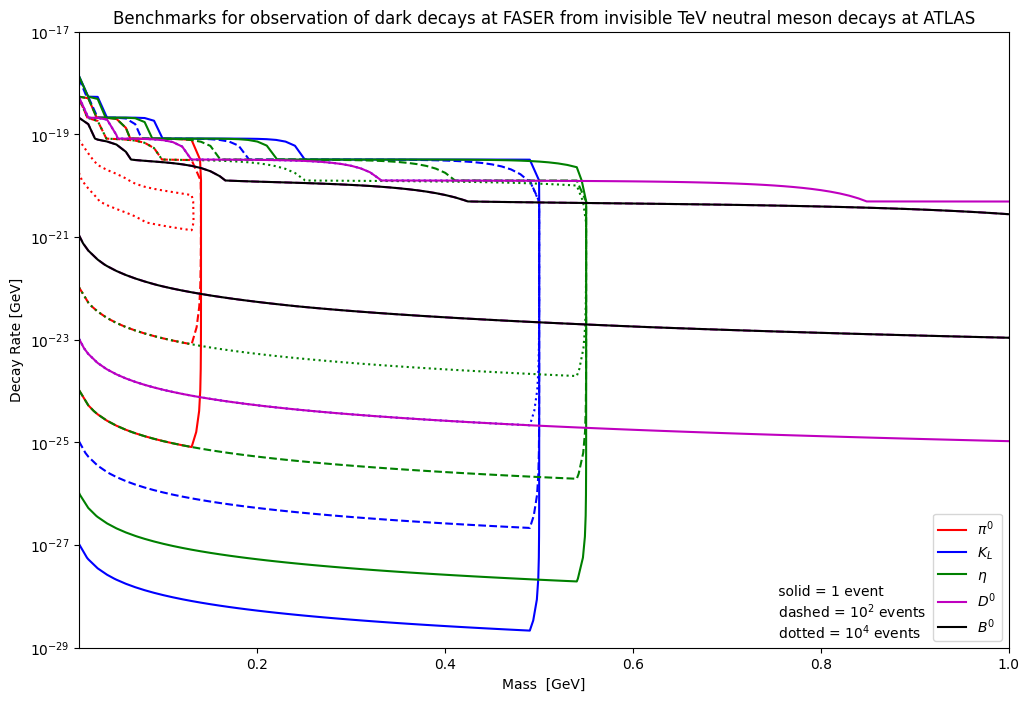

In [13]:
# This plot is inverting the above plots to better visualize the parameter space
# for the dark particles.

levels = [1, 100, 10000]
linestyles = ['solid', 'dashed', 'dotted']

fig = plt.figure(figsize=(12,8))

[plt.plot([0, 0], [0, 1], color=c) for c in ['r','b','g','m','k']]

plt.legend(['$\\pi^0$', '$K_L$', '$\\eta$', '$D^0$', '$B^0$'], loc='lower right')

mass_mask = ms > m_pi0
pi0_Decays[:,mass_mask]=0
CS = plt.contour(ms, gammas, pi0_Decays, levels=levels,
            colors='r',linestyles=linestyles)
# plt.clabel(CS,inline=1,fontsize=10)

mass_mask = ms > m_KL
KL_Decays[:,mass_mask] = 0
plt.contour(ms, gammas, KL_Decays, levels=levels,
            colors='b',linestyles=linestyles)

mass_mask = ms > m_eta
eta_Decays[:,mass_mask] = 0
plt.contour(ms, gammas, eta_Decays, levels=levels,
            colors='g',linestyles=linestyles)

mass_mask = ms > m_D
D_Decays[:,mass_mask] = 0
plt.contour(ms, gammas, D_Decays, levels=levels,
            colors='m',linestyles=linestyles)

mass_mask = ms > m_B
B_Decays[:,mass_mask] = 0
plt.contour(ms, gammas, B_Decays, levels=levels,
            colors='k',linestyles=linestyles)

plt.xlim([0.01,1])
plt.ylim([10**-29,10**-17])
plt.xlabel('Mass  [GeV]')
plt.ylabel('Decay Rate [GeV]')
# plt.xscale('log')
plt.yscale('log')

plt.annotate(' solid = 1 event \n dashed = $10^2$ events \n dotted = $10^4$ events', (0.75, 1.5*10**-29))

plt.title('Benchmarks for observation of dark decays at FASER from neutral meson decays at ATLAS');
# fig.savefig('benchmark.jpg')